In [14]:
import rasterio 
import matplotlib
import numpy as np


In [15]:
print("rasterio's version is: " + rasterio.__version__)
print("numpy's version is: " +np.__version__)

rasterio's version is: 1.2.10
numpy's version is: 1.20.1


In [16]:
# filepath to imgae data
img_fp = 'data/LE70220492002106EDC00_stack.gtif'

# Open a geospatial dataset
dataset = rasterio.open(img_fp)
print(dataset)

<open DatasetReader name='data/LE70220492002106EDC00_stack.gtif' mode='r'>


In [17]:
# what is the name of this image
img_name = dataset.name
print('Image filename: {n}\n'.format(n=img_name))

# How many bands does this image have?
num_bands = dataset.count
print('Number of bands in image: {n}\n'.format(n=num_bands))

# How many rows and columns?
rows, cols = dataset.shape
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

# Does the raster have a description or metadata?
desc = dataset.descriptions
metadata = dataset.meta

print('Raster description: {desc}\n'.format(desc=desc))

# What driver was used to open the raster?
driver = dataset.driver
print('Raster driver: {d}\n'.format(d=driver))

# What is the raster's projection?
proj = dataset.crs
print('Image projection:')
print(proj, '\n')

# What is the raster's "geo-transform"
gt = dataset.transform

print('Image geo-transform:\n{gt}\n'.format(gt=gt))
print('All raster metadata:')
print(metadata)
print('\n')

Image filename: data/LE70220492002106EDC00_stack.gtif

Number of bands in image: 8

Image size is: 250 rows x 250 columns

Raster description: ('band 1 reflectance', 'band 2 reflectance', 'band 3 reflectance', 'band 4 reflectance', 'band 5 reflectance', 'band 7 reflectance', 'band 6 temperature', 'Band 8')

Raster driver: GTiff

Image projection:
EPSG:32615 

Image geo-transform:
| 30.00, 0.00, 462405.00|
| 0.00,-30.00, 1741815.00|
| 0.00, 0.00, 1.00|

All raster metadata:
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 250, 'height': 250, 'count': 8, 'crs': CRS.from_epsg(32615), 'transform': Affine(30.0, 0.0, 462405.0,
       0.0, -30.0, 1741815.0)}




In [18]:
# Open the fourth band in our image - NIR
nir = dataset.read(4)
#The dimensions of the image
nir.shape

(250, 250)

In [19]:
datatype = dataset.dtypes
print('Band datatypes: {dt}'.format(dt=datatype))
# How about some band statistics?
band_mean = np.mean(nir)
band_min = np.amin(nir)
band_max = np.amax(nir)
band_stddev = np.std(nir)
print('Band range: {minimum} - {maximum}'.format(maximum=band_max,minimum=band_min))
print('Band mean, stddev: {m}, {s}\n'.format(m=band_mean, s=band_stddev))

Band datatypes: ('int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16')
Band range: 1007 - 8178
Band mean, stddev: 2700.18344, 710.1296021415855



In [20]:
full_img = dataset.read()
full_img.shape 

(8, 250, 250)

Image dimensions:  (8, 250, 250)


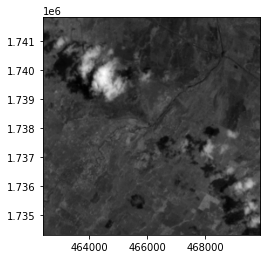

<AxesSubplot:>

In [21]:
from rasterio.plot import show 
# import the show function which allows us to display the image
print("Image dimensions: ", full_img.shape)
show(nir, transform=dataset.transform, cmap='gray')